# Import And Load 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
df = pd.read_csv("stay_num_zong_2011.csv",sep="\t")

# Box Detection

In [6]:
df001 = df.sort_values(['taz', 'timeperiod'])
df001.insert(len(df001.columns), 'anomaly_detection', np.nan)
df001.anomaly_detection = df001.anomaly_detection.astype(str)
# df001 = df001.reset_index(drop=True)
street_list = df001.taz.unique()
for street in street_list:
        whis = 1.5
        dftmp = df001[df001.taz==street]
        Q1 = np.percentile(dftmp.num, 25)
        Q3 = np.percentile(dftmp.num, 75)
        IQR = Q3 - Q1
        upper_whiser = Q3 + whis*IQR
        lower_whiser =  Q1 -  whis*IQR
        for row_num in dftmp.index:
            number = dftmp.at[row_num, 'num']
            if (number >= lower_whiser) & (number <= upper_whiser):
                df001.at[row_num, 'anomaly_detection'] = '正常'
            else:
                df001.at[row_num, 'anomaly_detection'] =  '异常' 
df001.to_csv('stay_num_zong_2011_box_detection.csv', index=False)
df001

,taz,timeperiod,num,anomaly_detection
745596,50005,2011-05-19 00:00:00,311,正常
857534,50005,2011-05-19 01:00:00,468,正常
417103,50005,2011-05-19 02:00:00,532,正常
921305,50005,2011-05-19 03:00:00,494,正常
733323,50005,2011-05-19 04:00:00,480,正常
236386,50005,2011-05-19 05:00:00,491,正常
741489,50005,2011-05-19 06:00:00,598,正常
1016832,50005,2011-05-19 07:00:00,1181,正常
1271801,50005,2011-05-19 08:00:00,2052,正常
1203301,50005,2011-05-19 09:00:00,2447,正常


In [9]:
df001[ df001['anomaly_detection']=='异常'  ]

,taz,timeperiod,num,anomaly_detection
868561,50007,2011-05-21 13:00:00,440,异常
846611,50007,2011-05-21 14:00:00,479,异常
621453,50007,2011-05-21 15:00:00,535,异常
205170,50007,2011-05-21 16:00:00,461,异常
760767,50007,2011-05-22 14:00:00,452,异常
184909,50007,2011-05-22 15:00:00,496,异常
1266274,50007,2011-05-22 16:00:00,441,异常
606437,50012,2011-05-19 00:00:00,605,异常
498810,50012,2011-05-20 05:00:00,592,异常
752559,50012,2011-05-20 06:00:00,737,异常


# Model Architecture

## Extracting the Features 

In [26]:
df002 = df.sort_values(['taz', 'timeperiod'])
df002['timeperiod'] = pd.to_datetime(df002['timeperiod'])
df002['day'] = df002['timeperiod'].map(lambda x: x.day )
df002['hour'] = df002['timeperiod'].map(lambda x: x.strftime('%H') )
df002['weekday'] = df002['timeperiod'].map(lambda x: x. weekday()+1 )
# del df002['timeperiod']

In [27]:
df002[df002['taz']==105328]

,taz,timeperiod,num,day,hour,weekday
668797,105328,2011-05-19 00:00:00,12,19,00,4
1163942,105328,2011-05-19 01:00:00,24,19,01,4
766204,105328,2011-05-19 02:00:00,32,19,02,4
1059288,105328,2011-05-19 03:00:00,38,19,03,4
78065,105328,2011-05-19 04:00:00,47,19,04,4
899709,105328,2011-05-19 05:00:00,65,19,05,4
952507,105328,2011-05-19 06:00:00,103,19,06,4
687872,105328,2011-05-19 07:00:00,160,19,07,4
10980,105328,2011-05-19 08:00:00,197,19,08,4
500120,105328,2011-05-19 09:00:00,195,19,09,4


In [28]:
del df002['timeperiod']

## Ensemble Outlier Detection Model

###  High bias Model

In [30]:
Y_train

array([[ -2.45845143e+00],
       [ -1.20716285e+00],
       [ -9.47749367e-01],
       [ -1.13696862e+00],
       [ -1.09118976e+00],
       [ -9.41645520e-01],
       [ -5.60155100e-01],
       [  3.03539211e-01],
       [  6.97237324e-01],
       [  7.24704635e-01],
       [  7.46068098e-01],
       [  9.68858503e-01],
       [  8.25418105e-01],
       [  9.41391193e-01],
       [  9.26131576e-01],
       [  7.52171945e-01],
       [  9.47495040e-01],
       [  1.19470083e+00],
       [  7.43016175e-01],
       [  2.11943361e+00],
       [  1.78372204e+00],
       [  1.45716624e+00],
       [  1.21301237e+00],
       [  9.41391193e-01],
       [  5.78212313e-01],
       [  3.58473831e-01],
       [  1.99773817e-01],
       [  8.38007289e-02],
       [ -1.65312515e-03],
       [ -2.49812643e+00],
       [ -2.05559755e+00],
       [ -1.06372245e+00],
       [ -1.45093523e-01],
       [  1.35683426e-01],
       [  4.53083455e-01],
       [  5.66004620e-01],
       [  6.39250780e-01],
 

In [30]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
taz = int(105328)
scaler = StandardScaler()
train  = df002[df002['taz']==taz]
tmp = train.pop('num')
Y_train = scaler.fit_transform(tmp.values.reshape(tmp.values.shape[0],1))  #168 is num samples
X_train = train.values
XGBR = xgb.XGBRegressor(max_depth =3,learning_rate=0.1,n_estimators=100)
XGBR.fit(X_train,Y_train,verbose=1)

/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [31]:
y_pred = XGBR.predict(X_train)
error_list = abs(y_pred-Y_train.reshape(tmp.values.shape[0],))
el = pd.DataFrame(error_list,columns=['deviation'])
dfx = df[df['taz']== taz].sort_values('timeperiod').reset_index(drop=True)
result = pd.concat((dfx,el),axis=1) 
result = result[['taz','timeperiod','num','deviation']]
result['method_1']= result['deviation'].map(lambda x:-1 if x>0.5 else 1)
result[result['method_1']==-1]

,taz,timeperiod,num,deviation,method_1


#### 偏差分布

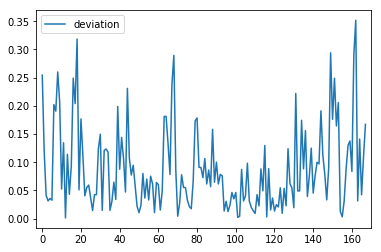

In [32]:
el.plot(xlim=[-3,170])

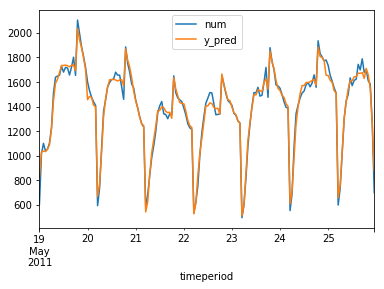

In [100]:
pred = pd.DataFrame(scaler.inverse_transform(y_pred),columns=['y_pred'])
pic = pd.concat((result,pred),axis = 1) 
pic['timeperiod'] = pd.to_datetime(pic['timeperiod'])
pic = pic[['taz','timeperiod','num','y_pred']]
pic.set_index('timeperiod')
pic.plot(x='timeperiod',y=['num','y_pred'],kind='line')

### Isolation forest  
* which is good at global outlier detection 

In [16]:
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators=500)
dfx = df002[df002['taz']== taz].reset_index(drop=True)
trainset = pd.concat((dfx,result['method_1'] ),axis=1)
trainset.pop('taz')
iforest.fit(trainset.values)
# ano = iforest.predict(Y_train.reshape(168,1))
ano=iforest.predict(trainset.values)
iforest = pd.DataFrame(ano,columns=['method_2'])
result = pd.concat((result,iforest),axis=1) 

In [17]:
result[(result['method_2']==-1)]

,taz,timeperiod,num,deviation,method_1,method_2
0,105284,2011-05-19 00:00:00,15,0.151106,1,-1
1,105284,2011-05-19 01:00:00,14,0.189060,1,-1
11,105284,2011-05-19 11:00:00,113,0.568723,-1,-1
19,105284,2011-05-19 19:00:00,120,0.257245,1,-1
20,105284,2011-05-19 20:00:00,117,0.187558,1,-1
23,105284,2011-05-19 23:00:00,101,0.040034,1,-1
28,105284,2011-05-20 04:00:00,90,0.560149,-1,-1
29,105284,2011-05-20 05:00:00,25,0.588388,-1,-1
31,105284,2011-05-20 07:00:00,32,0.604509,-1,-1
33,105284,2011-05-20 09:00:00,36,0.634291,-1,-1


#### iforest result

In [18]:
result[(result['method_2']==-1)&
       (result['method_1']==-1)]

,taz,timeperiod,num,deviation,method_1,method_2
11,105284,2011-05-19 11:00:00,113,0.568723,-1,-1
28,105284,2011-05-20 04:00:00,90,0.560149,-1,-1
29,105284,2011-05-20 05:00:00,25,0.588388,-1,-1
31,105284,2011-05-20 07:00:00,32,0.604509,-1,-1
33,105284,2011-05-20 09:00:00,36,0.634291,-1,-1
36,105284,2011-05-20 12:00:00,77,0.750590,-1,-1


### LocalOutlierFactor(LOF) 
* which is good at local outlier dection based on density
* measures the local deviation of density of a given sample with respect to its neighbors.
* By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. 

In [19]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20)
trainset= df002[df002['taz']==taz]
trainset.pop('taz')
# lof.fit(trainset.values)
ano=lof.fit_predict(trainset.values)
iforest = pd.DataFrame(ano,columns=['method_3'])
result = pd.concat((result,iforest),axis=1) 

In [20]:
result[(result['method_3']==-1)]

,taz,timeperiod,num,deviation,method_1,method_2,method_3
0,105284,2011-05-19 00:00:00,15,0.151106,1,-1,-1
1,105284,2011-05-19 01:00:00,14,0.189060,1,-1,-1
9,105284,2011-05-19 09:00:00,92,0.268907,1,1,-1
10,105284,2011-05-19 10:00:00,106,0.322403,1,1,-1
11,105284,2011-05-19 11:00:00,113,0.568723,-1,-1,-1
19,105284,2011-05-19 19:00:00,120,0.257245,1,-1,-1
20,105284,2011-05-19 20:00:00,117,0.187558,1,-1,-1
21,105284,2011-05-19 21:00:00,107,0.007937,1,1,-1
22,105284,2011-05-19 22:00:00,106,0.124993,1,1,-1
23,105284,2011-05-19 23:00:00,101,0.040034,1,-1,-1


In [21]:
result[(result['method_2']==-1)&
       (result['method_1']==-1)|
       (result['method_1']==-1)&
       (result['method_3']==-1)|
       (result['method_2']==-1)&
       (result['method_3']==-1)
      ]

,taz,timeperiod,num,deviation,method_1,method_2,method_3
0,105284,2011-05-19 00:00:00,15,0.151106,1,-1,-1
1,105284,2011-05-19 01:00:00,14,0.189060,1,-1,-1
11,105284,2011-05-19 11:00:00,113,0.568723,-1,-1,-1
19,105284,2011-05-19 19:00:00,120,0.257245,1,-1,-1
20,105284,2011-05-19 20:00:00,117,0.187558,1,-1,-1
23,105284,2011-05-19 23:00:00,101,0.040034,1,-1,-1
28,105284,2011-05-20 04:00:00,90,0.560149,-1,-1,-1
29,105284,2011-05-20 05:00:00,25,0.588388,-1,-1,1
31,105284,2011-05-20 07:00:00,32,0.604509,-1,-1,1
33,105284,2011-05-20 09:00:00,36,0.634291,-1,-1,1


* 50012 高偏差和孤立森林发现了其中的异常，局部异常因子没有
* 105291 孤立森林和局部异常因子检测到了异常，高偏差没有